# 9.3. Keras

In [2]:
# Keras is now directly part of the tensorflow package, import: 
import tensorflow.keras

In [3]:
from sklearn.datasets import make_moons
#!pip install scikit-learn

import matplotlib.pyplot as plt

X, y = make_moons(n_samples=5000, noise=0.2, random_state=42)

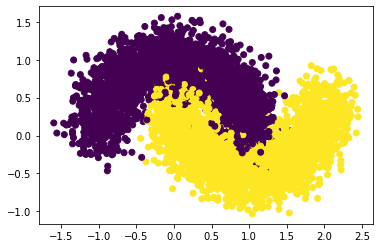

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)

In [5]:
from tensorflow.keras import Sequential #tf terminology for Feed-Forward Network
from tensorflow.keras.layers import Dense #Fully-connected layers (normal layer of neurons)
from tensorflow.keras.layers import Activation

In [6]:
X[0].shape

(2,)

In [7]:
X

array([[ 0.07155254,  1.12326387],
       [ 0.06156247,  0.10662974],
       [ 0.05884503,  0.35182941],
       ...,
       [ 0.4130518 ,  0.15968113],
       [ 1.26313969, -0.39675884],
       [ 0.32459159,  0.96548022]])

### 1. Instantiate model

In [8]:
model = Sequential([
    Dense(4, input_shape=(2,)), #hardest part to get right
    #this means that each data point has 2 features / columns / dimensions
    # first 2 => 2 neurons, and the (2, ) means each data point has 2 dimensions
    Activation('sigmoid'),
    Dense(1),
    Activation('sigmoid')  
])

2022-03-06 15:03:28.984914: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-06 15:03:28.985755: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-06 15:03:28.986098: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


**Input shape**

The input_shape parameter is the one causing beginners the most headaches.

- it must be specified in the first layer

- it must not be specified in any other layer

- it contains the shape of the input, but without the first dimension

- the first dimension of your input data must be the data points

- if your data has only two dimensions, input_shape still must be written as a tuple, e.g. (2, )

- if your data has only one dimension, you may have to reshape your data to (n, 1) with NumPy.



- input shape is SUPER IMPORTANT. tells Keras what the input shape is, as a tuple. It is the shape of a SINGLE DATA POINT. The network doesn't care how many data points it receives (it's going to get different number of data points among trainig and testing, anyways)
- the dense layers get their biases automatically. Keras handles this for us. weights are also initialized automatically, unless, of course, you want to overwrite it with a hyperparameter.

**Output shape**

The shape of the predicted output is determined by the number of neurons/units and the activation function in the last layer of the network. The specific configuration depends on the shape of the true (possibly one-hot-encoded) output:

- For binary classification there is 1 unit with a sigmoid activation.

- For single output regression there is 1 unit with a linear activation.

- For multiclass classification with K classes there are K units with a softmax activation.

- For multilabel classification with K classes there are K units with a sigmoid activation.

For multiclass/ multilabel classification the true output must be one-hot encoded before fitting. The function tensorflow.keras.utils.to_categorical does that for you.


In [9]:
# To view all layers and the number of parameters:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
activation (Activation)      (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


### 2. Compile 

In [10]:
#in Keras, there's an extra step between instatiate and fit: compile model

in keras:
1. instantiate the model - model = Sequential([...])
2. compile the model - model = model.compile(...) 
3. fit the model - model = model.fit(...) 

In [11]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#compiling the model basically translates our keras code into lower-level TensorFlow / C++

- the complicated step is conceptually very new. This is where it actually communicates with TensorFlow and creates what's called a 'computation graph' -- something that Keras needs to run the model.
- Keras is compiling our model into a very abstract form that is implemented in C++.
- include ``metrics = ['accuracy']`` to give you accuracy during the epoch

**Loss function**

The choice of a loss function depends on the learning goal:

- For regression tasks choose mse.

- For binary classification or multilabel classification choose binary_crossentropy.

- For multiclass classification choose categorical_crossentropy.

### 3. Train the model and evaluate

In [12]:
h = model.fit(X, y, epochs=50, batch_size=500, verbose=1, validation_split=0.2)
#epochs -> iteration of backpropagation
#batch_size -> https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network

2022-03-06 15:03:29.395528: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-06 15:03:29.412962: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2699905000 Hz


Epoch 1/50
8/8 [==============================] - 2s 144ms/step - loss: 0.7207 - accuracy: 0.5101 - val_loss: 0.7237 - val_accuracy: 0.4750
Epoch 2/50
8/8 [==============================] - 0s 37ms/step - loss: 0.7164 - accuracy: 0.5028 - val_loss: 0.7186 - val_accuracy: 0.4750
Epoch 3/50
8/8 [==============================] - 0s 41ms/step - loss: 0.7128 - accuracy: 0.4985 - val_loss: 0.7142 - val_accuracy: 0.4750
Epoch 4/50
8/8 [==============================] - 0s 44ms/step - loss: 0.7079 - accuracy: 0.5035 - val_loss: 0.7100 - val_accuracy: 0.4750
Epoch 5/50
8/8 [==============================] - 0s 41ms/step - loss: 0.7043 - accuracy: 0.5040 - val_loss: 0.7061 - val_accuracy: 0.4750
Epoch 6/50
8/8 [==============================] - 0s 39ms/step - loss: 0.6991 - accuracy: 0.5157 - val_loss: 0.7023 - val_accuracy: 0.4750
Epoch 7/50
8/8 [==============================] - 0s 39ms/step - loss: 0.6971 - accuracy: 0.5063 - val_loss: 0.6988 - val_accuracy: 0.4750
Epoch 8/50
8/8 [==========

In [13]:
# loss and accuracy
score = model.evaluate(X, y, batch_size=500)
print(score)

10/10 [==============================] - 0s 4ms/step - loss: 0.5811 - accuracy: 0.8012
[0.5811359286308289, 0.8011999726295471]


### 4. Check the history

The fit() function returns a History object. You

In [14]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

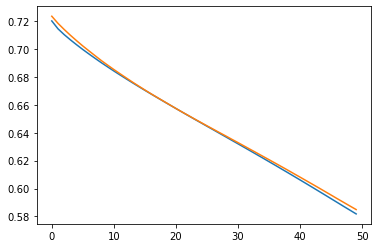

In [15]:
# plot the learning curve
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

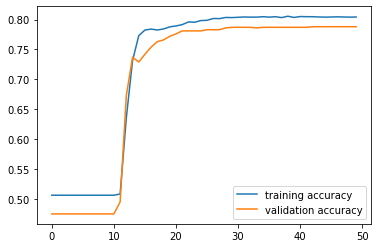

In [16]:
# plotting the score curve
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])

In [21]:
# prediction on new data points
print(model.predict(X[:12]))

[[0.3957392 ]
 [0.46318296]
 [0.44590712]
 [0.40732467]
 [0.49261504]
 [0.5252279 ]
 [0.4917268 ]
 [0.39023602]
 [0.37905338]
 [0.35293472]
 [0.41860327]
 [0.49088034]]


In [22]:
print(y[:12])

[0 1 1 0 0 0 0 0 0 0 0 0]
